In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor,export_graphviz
import graphviz
import dtreeviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import tree
import pandas as pd
import numpy as np
import pickle
import os
from pypinyin import pinyin

In [2]:
def convert(words):
    py = pinyin(words)
    res = ""
    for i in py:
       res+=i[0][0].upper()
    return res

In [3]:
# hzr
dataset = pd.read_csv('../../../data/csv_file/feature_table_result.csv')
dataset.dropna(inplace=True)
hzr_data = pd.DataFrame(dataset[dataset['土类'] == "黄棕壤"])
hzr_data["SC2_label"] = hzr_data.SC2.astype("category").cat.codes
hzr_data["DL_label"] = hzr_data.DL.astype("category").cat.codes
hzr_data["DZ_label"] = hzr_data.DZ.astype("category").cat.codes
hzr_data["TL_label"] = hzr_data.土类.astype("category").cat.codes
hzr_data["YL_label"] = hzr_data.亚类.astype("category").cat.codes
hzr_data["TS_label"] = hzr_data.土属.astype("category").cat.codes
hzr_data["TZ_label"] = hzr_data.土种.astype("category").cat.codes
hzr_target = 'TZ_label'
features = ['DEM', 'TWI5', 'TPI201', 'TMP','SLOP', 'PRE', 'NIGTH', 'NDVI','PH', 'SOM', 'SC2_label', 'DL_label', 'DZ_label']
hzrX = hzr_data[features]
hzry = hzr_data[hzr_target]
hzrX_train, hzrX_test, hzry_train, hzry_test = train_test_split(hzrX, hzry, test_size=0.2, random_state=52)

In [4]:
hzr_result = hzr_data.groupby('TZ_label')["土种"].apply(lambda x: list(x.unique())).to_dict()

In [5]:
# 通过网格搜索找到最优超参数
hzr_params = {'criterion':['gini','entropy'], 'max_depth':list(range(2,100))} 
hzr_grid_tree = GridSearchCV(DecisionTreeClassifier(), hzr_params, cv=5)
hzr_grid_tree.fit(hzrX_train, hzry_train)
print(hzr_grid_tree.best_params_)

d:\Program Files\ArcGIS\Clone_env2\arcgispro-py3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.


{'criterion': 'entropy', 'max_depth': 93}


In [6]:

hzr_tree_classifier = DecisionTreeClassifier(random_state=42,**hzr_grid_tree.best_params_)
hzr_tree_classifier.fit(hzrX_train, hzry_train)

DecisionTreeClassifier(criterion='entropy', max_depth=93, random_state=42)

In [7]:
# 查看准确率
hzr_y_test_pred= hzr_tree_classifier.predict(hzrX_test)
hzr_y_train_pred = hzr_tree_classifier.predict(hzrX_train)
accuracy_test = accuracy_score(hzry_test,hzr_y_test_pred)
accuracy_train = accuracy_score(hzry_train,hzr_y_train_pred)
print(accuracy_train,accuracy_test)

1.0 0.8974358974358975


In [8]:
# 画图
hzr_model = dtreeviz.model(hzr_tree_classifier,
                           X_train=hzrX_train, y_train=hzry_train,
                           feature_names=features,
                           target_name=hzr_target, class_names=[convert(hzr_result[_][0]) for _ in hzr_result])

d:\Program Files\ArcGIS\Clone_env2\arcgispro-py3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


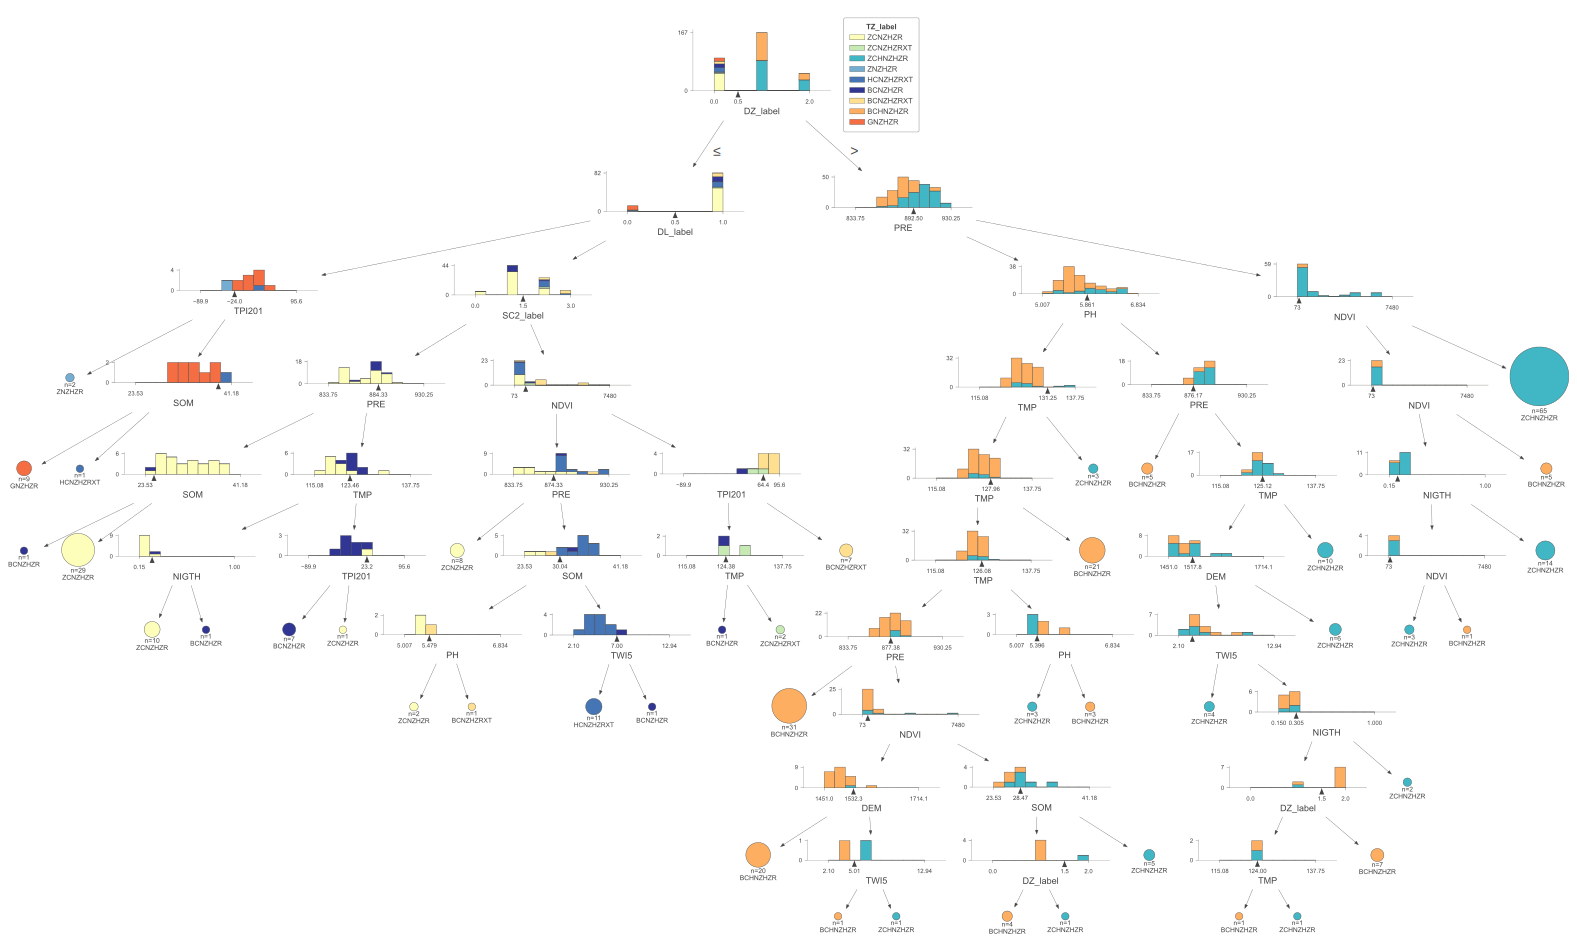

In [9]:
hzr_model.view()

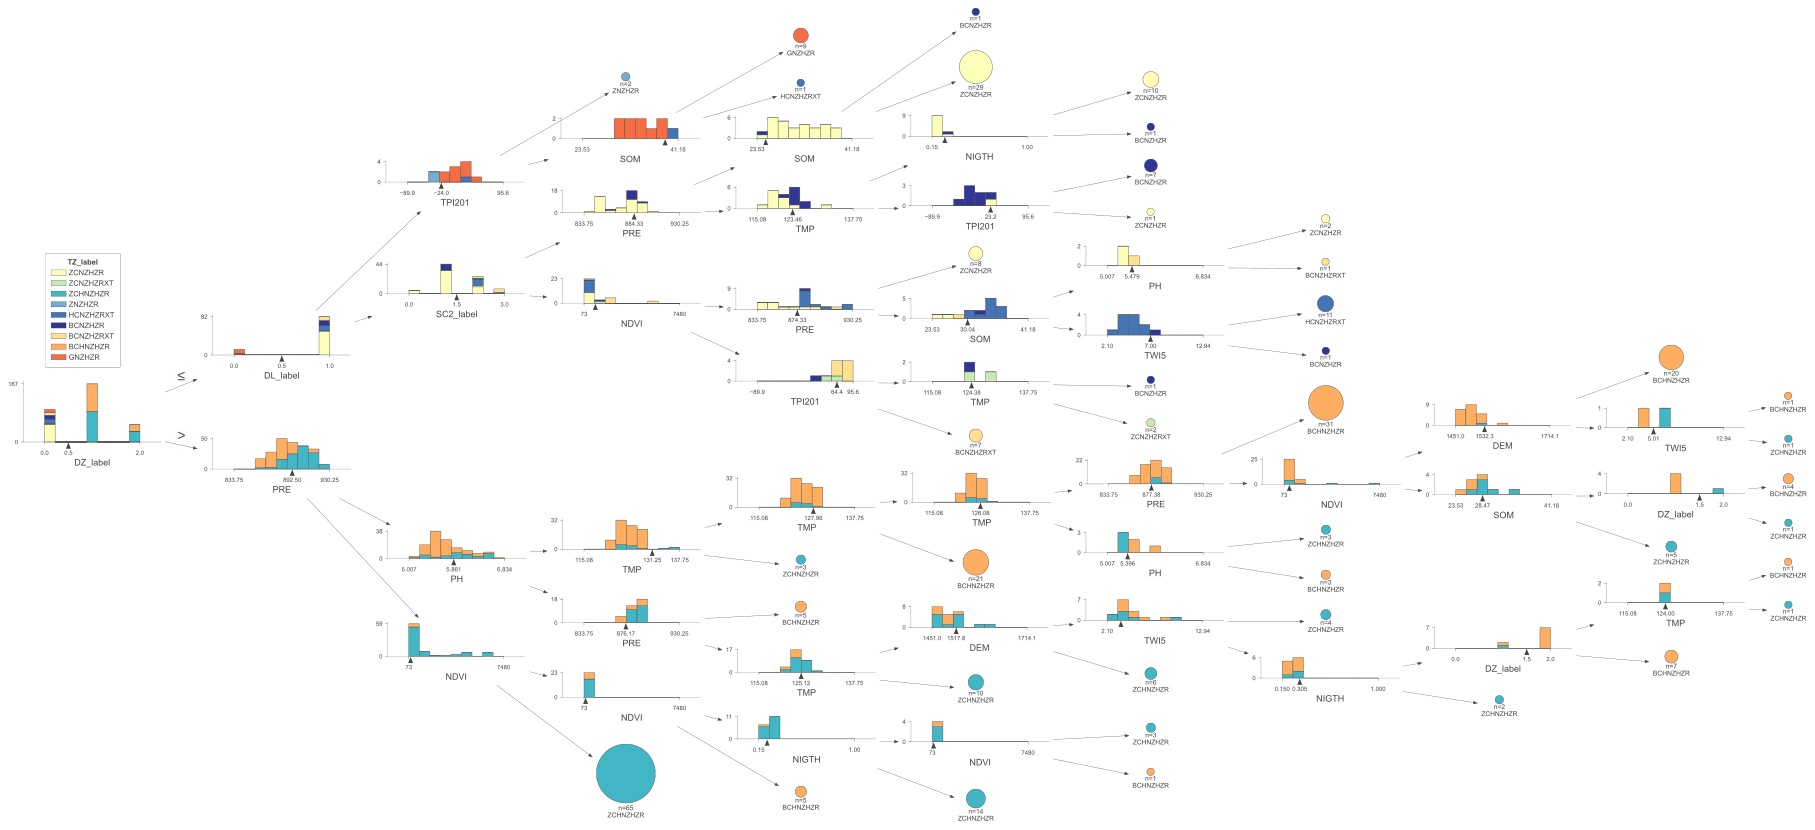

In [10]:
hzr_model.view(orientation="LR")

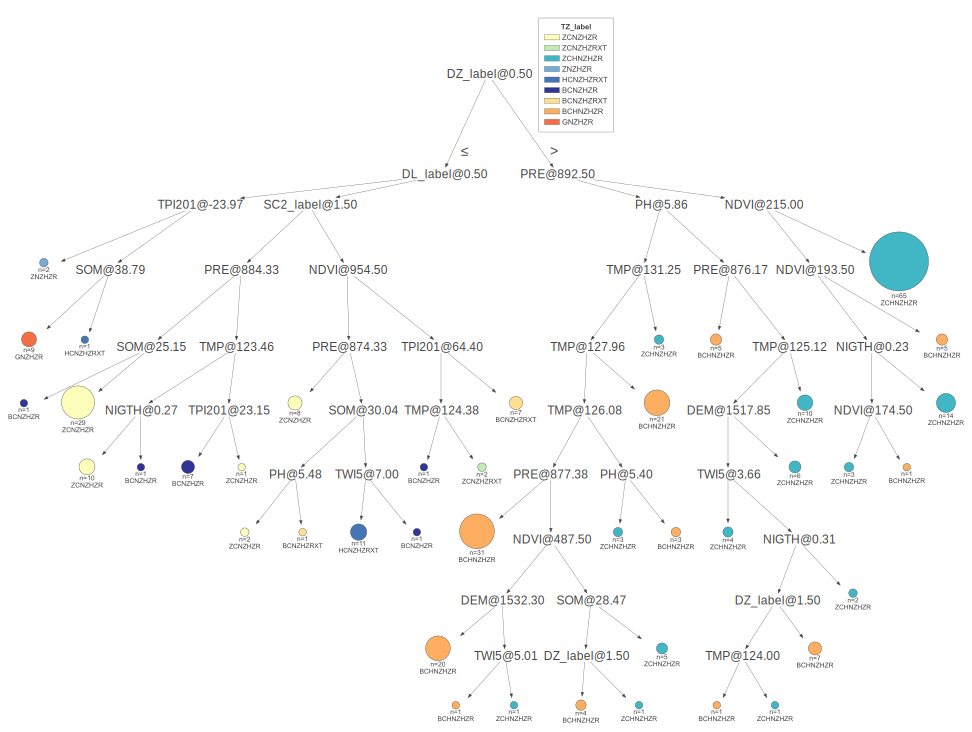

In [11]:
hzr_model.view(fancy=False)